In [1]:
%pylab inline
import sklearn.cluster
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
def calculate_confusion_matrix(data, datalabels, xlabels, ylabels):
    cm = np.zeros((len(ylabels), len(xlabels)))
    for i in ylabels:
        cm[i,:] = data[datalabels == i,:].mean(axis=0)
        
    maxs = cm.argmax(axis=0)
    sorted_xlabels = sorted(xlabels, lambda a, b: cmp(maxs[xlabels.index(a)], maxs[xlabels.index(b)]))
    sorted_cm = cm[:,[xlabels.index(xlabel) for xlabel in sorted_xlabels]]        
        
    return sorted_cm, sorted_xlabels, [str(l) for l in ylabels]


In [3]:
def plot_confusion_matrix(cm, xclasses, yclasses,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          xlabel='Predicted label', ylabel='True label'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xtick_marks = np.arange(len(xclasses))
    plt.xticks(xtick_marks, xclasses, rotation=90)
    ytick_marks = np.arange(len(yclasses))
    plt.yticks(ytick_marks, yclasses)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [4]:
orig_data = data = np.load("vessels_gear_embedding.npz")["data"]

In [5]:
width = 19200
labels = ['cargo', 'tanker', 'trawlers', 'sailing', 'set_gillnets', 'pole_and_line', 'motor_passenger', 'reefer', 'tug', 'set_longlines', 'pots_and_traps', 'other_not_fishing', 'gear', 'squid_jigger', 'seismic_vessel', 'purse_seines', 'drifting_longlines', 'other_fishing', 'trollers']
label_to_idx = {label: idx for idx, label in enumerate(labels)}
idx_to_label = {idx: label for idx, label in enumerate(labels)}


In [6]:
datasize = 10000
res = None
for idx in xrange(0, len(labels)):
    chunk = data[data[:,width+4] == idx]
    chunk = chunk[np.random.randint(len(chunk), size=datasize / len(labels)),:]
    if res is None:
        res = chunk
    else:
        res = np.append(res, chunk, axis=0)
data = res

In [7]:
stds = data[:,:width].std(axis=0)
means = data[:,:width].mean(axis=0)
data[:,:width] -= means
data[:,:width] /= (stds+1e-30)

In [ ]:
nclusters=25
clustering = sklearn.cluster.AgglomerativeClustering(linkage="ward", n_clusters=nclusters)

In [ ]:
c = clustering.fit(data[:,:width])

In [ ]:
cm, xlabels, ylabels = calculate_confusion_matrix(
    data[:,width+6:width+6+len(labels)],
    clustering.labels_,
    labels,
    range(0, nclusters))

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, xlabels, ylabels, ylabel='Cluster', xlabel='Class')
plt.show()

In [8]:
import sklearn.decomposition

In [16]:
transform = sklearn.decomposition.PCA(n_components=50)

transform.fit(data[:,:width])
transformed_data = transform.transform(data[:,:width])

nclusters=25
clustering = sklearn.cluster.AgglomerativeClustering(linkage="ward", n_clusters=nclusters)
c = clustering.fit(transformed_data)
cm, xlabels, ylabels = calculate_confusion_matrix(
    data[:,width+6:width+6+len(labels)],
    clustering.labels_,
    labels,
    range(0, nclusters))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, xlabels, ylabels, ylabel='Cluster', xlabel='Class')
plt.show()

Execution time 0:00:50.129738
(9994, 50)


In [24]:
sizes = {label: sum(orig_data[:,width+4] == idx)
         for idx, label in enumerate(labels)}

In [25]:
sorted(sizes.items(), cmp=lambda a, b: cmp(a[1], b[1]))

[('other_not_fishing', 6),
 ('trollers', 112),
 ('other_fishing', 217),
 ('gear', 323),
 ('pole_and_line', 372),
 ('pots_and_traps', 483),
 ('squid_jigger', 521),
 ('seismic_vessel', 547),
 ('set_longlines', 1074),
 ('reefer', 1500),
 ('set_gillnets', 1712),
 ('purse_seines', 3348),
 ('drifting_longlines', 3783),
 ('sailing', 6920),
 ('motor_passenger', 15573),
 ('trawlers', 16970),
 ('tug', 21175),
 ('tanker', 33764),
 ('cargo', 72826)]

In [26]:
len(orig_data)

181226

Confusion matrix, without normalization


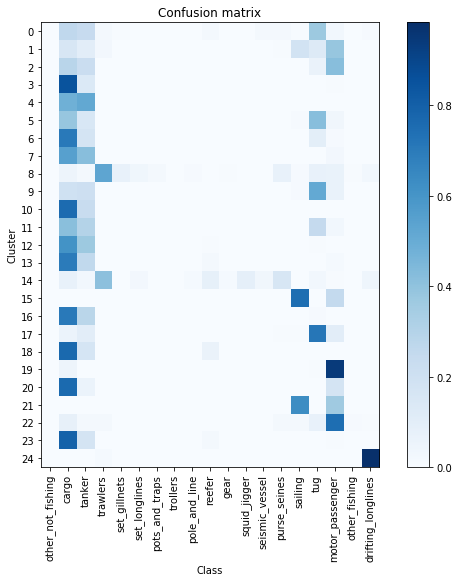

In [33]:
transform = sklearn.decomposition.PCA(n_components=50)

transform.fit(data[:,:width])

random_data = orig_data[np.random.randint(len(orig_data), size=20000),:]

transformed_data = transform.transform(random_data[:,:width])

nclusters=25
clustering = sklearn.cluster.AgglomerativeClustering(linkage="ward", n_clusters=nclusters)
c = clustering.fit(transformed_data)
cm, xlabels, ylabels = calculate_confusion_matrix(
    random_data[:,width+6:width+6+len(labels)],
    clustering.labels_,
    labels,
    range(0, nclusters))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, xlabels, ylabels, ylabel='Cluster', xlabel='Class')
plt.show()

In [29]:
transformed_data.shape

(181226, 20)

Confusion matrix, without normalization


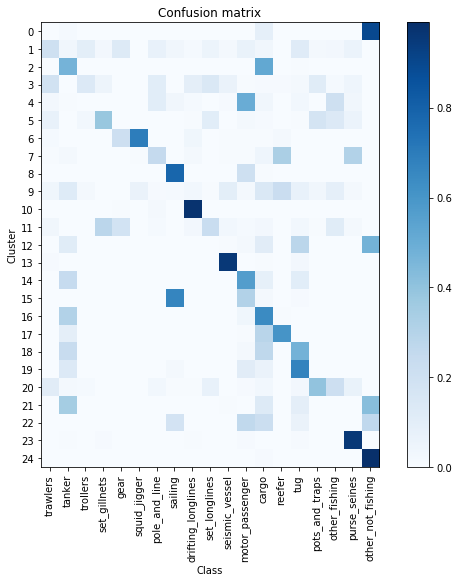

In [34]:
transform = sklearn.decomposition.PCA(n_components=50)

transform.fit(data[:,:width])
transformed_data = transform.transform(data[:,:width])

nclusters=25
clustering = sklearn.cluster.AgglomerativeClustering(linkage="ward", n_clusters=nclusters)
c = clustering.fit(transformed_data)
cm, xlabels, ylabels = calculate_confusion_matrix(
    data[:,width+6:width+6+len(labels)],
    clustering.labels_,
    labels,
    range(0, nclusters))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, xlabels, ylabels, ylabel='Cluster', xlabel='Class')
plt.show()